## O[penpose OpenCV
OpenPose 支援多種輸出格式，包括 COCO(18)、BODY(25) 和 MPI(15)。這些格式定義了不同的身體部位特徵點數量和排列方式。

- COCO(18)：COCO 格式定義了 18 個身體部位特徵點，包括頭部、頸部、肩膀、手肘、手腕、臀部、膝蓋和腳踝等。這個格式通常用於 COCO (Common Objects in Context) 數據集，主要用於物體檢測和姿勢估計任務。
- BODY(25)：BODY 格式定義了 25 個身體部位特徵點，比 COCO 多了幾個額外的特徵點，包括鼻子、眼睛、耳朵、胸部和腳部的一些細分部位。這個格式提供了更詳細的身體部位信息，可以用於更精細的姿勢分析和行為識別。
- MPI(15)：MPI 格式定義了 15 個身體部位特徵點，這個格式通常用於 MPI (Max Planck Institute) 數據集，主要用於姿勢估計和人體動作識別。相對於 COCO 和 BODY，MPI 格式的特徵點數量較少，但足以提供基本的姿勢信息。

### Reference
- [Deep Learning based Human Pose Estimation using OpenCV](https://learnopencv.com/deep-learning-based-human-pose-estimation-using-opencv-cpp-python/)

In [36]:
from __future__ import division
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import os


class general_pose_model(object):
    def __init__(self, modelpath, mode="BODY25"):
        # 指定采用的模型
        #   Body25: 25 points
        #   COCO:   18 points
        #   MPI:    15 points
        self.inWidth = 368
        self.inHeight = 368
        self.threshold = 0.1
        if mode == "BODY25":
            self.pose_net = self.general_body25_model(modelpath)
        elif mode == "COCO":
            self.pose_net = self.general_coco_model(modelpath)
        elif mode == "MPI":
            self.pose_net = self.get_mpi_model(modelpath)


    def get_mpi_model(self, modelpath):
        self.points_name = { 
            "Head": 0, "Neck": 1, 
            "RShoulder": 2, "RElbow": 3, "RWrist": 4,
            "LShoulder": 5, "LElbow": 6, "LWrist": 
            7, "RHip": 8, "RKnee": 9, "RAnkle": 10, 
            "LHip": 11, "LKnee": 12, "LAnkle": 13, 
            "Chest": 14, "Background": 15 }
        self.num_points = 15
        self.point_pairs = [[0, 1], [1, 2], [2, 3], 
                            [3, 4], [1, 5], [5, 6], 
                            [6, 7], [1, 14],[14, 8], 
                            [8, 9], [9, 10], [14, 11], 
                            [11, 12], [12, 13]
                            ]
        prototxt = os.path.join(
            modelpath,
            "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt")
        caffemodel = os.path.join(
            modelpath, 
            "pose/mpi/pose_iter_160000.caffemodel")
        mpi_model = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)

        return mpi_model


    def general_coco_model(self, modelpath):
        self.points_name = {
            "Nose": 0, "Neck": 1, 
            "RShoulder": 2, "RElbow": 3, "RWrist": 4,
            "LShoulder": 5, "LElbow": 6, "LWrist": 7, 
            "RHip": 8, "RKnee": 9, "RAnkle": 10, 
            "LHip": 11, "LKnee": 12, "LAnkle": 13, 
            "REye": 14, "LEye": 15, 
            "REar": 16, "LEar": 17, 
            "Background": 18}
        self.num_points = 18
        self.point_pairs = [[1, 0], [1, 2], [1, 5], 
                            [2, 3], [3, 4], [5, 6], 
                            [6, 7], [1, 8], [8, 9],
                            [9, 10], [1, 11], [11, 12], 
                            [12, 13], [0, 14], [0, 15], 
                            [14, 16], [15, 17]]
        prototxt   = os.path.join(
            modelpath, 
            "pose/coco/pose_deploy_linevec.prototxt")
        caffemodel = os.path.join(
            modelpath, 
            "pose/coco/pose_iter_440000.caffemodel")
        coco_model = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)

        return coco_model


    def general_body25_model(self, modelpath):
        self.points_name = {
            "None": 0, "Neck": 1, 
            "RShoulder": 2, "RElbow": 3, "RWrist": 4, 
            "LShoulder": 5, "LElbow": 6, "LWrist": 7,
            "MidHip": 8, "RHip": 9, "RKnee": 10, 
            "RAnkle": 11, "LHip": 12, "LKnee": 13, 
            "LAnkle": 14, "REye": 15, "LEye": 16, 
            "REar": 17, "LEar": 18, "LBigToe": 19, 
            "LSmallToe": 20, "LHeel": 21, "RBigToe": 22, 
            "RSmallToe": 23, "RHeel": 24 }
        self.num_points = 25
        self.point_pairs = [[1, 0], [1, 2], [1, 5], 
                            [2, 3], [3, 4], [5, 6], 
                            [6, 7], [0, 15], [15, 17], 
                            [0, 16], [16, 18], [1, 8],
                            [8, 9], [9, 10], [10, 11], 
                            [11, 22], [22, 23], [11, 24],
                            [8, 12], [12, 13], [13, 14], 
                            [14, 19], [19, 20], [14, 21]]
        self.colors_25 = [[255, 0, 0], [255, 85, 0], [255, 170, 0],
             [255, 255, 0], [170, 255, 0], [85, 255, 0],
             [0, 255, 0], [0, 255, 85], [0, 255, 170],
             [0, 255, 255], [0, 170, 255], [0, 85, 255],
             [0, 0, 255], [85, 0, 255], [170, 0, 255],
             [255, 0, 255], [255, 0, 170], [255, 0, 85],
             [255, 170, 85], [255, 170, 170], [255, 170, 255],
             [255, 85, 85], [255, 85, 170], [255, 85, 255],
             [170, 170, 170]]
        prototxt   = os.path.join(
            modelpath, 
            "pose/body_25/pose_deploy.prototxt")
        caffemodel = os.path.join(
            modelpath, 
            "pose/body_25/pose_iter_584000.caffemodel")
        coco_model = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)

        return coco_model


    def predict(self, imgfile):
        img_cv2 = cv2.imread(imgfile)
        img_height, img_width, _ = img_cv2.shape
        inpBlob = cv2.dnn.blobFromImage(img_cv2, 
                                        1.0 / 255, 
                                        (self.inWidth, self.inHeight),
                                        (0, 0, 0), 
                                        swapRB=False, 
                                        crop=False)
        self.pose_net.setInput(inpBlob)
        self.pose_net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
        self.pose_net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL)

        output = self.pose_net.forward()

        H = output.shape[2]
        W = output.shape[3]
        print(output.shape)

        # vis heatmaps
        self.vis_heatmaps(img_file, output)

        #
        points = []
        for idx in range(self.num_points):
            probMap = output[0, idx, :, :] # confidence map.

            # Find global maxima of the probMap.
            minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

            # Scale the point to fit on the original image
            x = (img_width * point[0]) / W
            y = (img_height * point[1]) / H

            if prob > self.threshold:
                points.append((int(x), int(y)))
            else:
                points.append(None)

        return points


    def vis_heatmaps(self, imgfile, net_outputs):
        img_cv2 = cv2.imread(imgfile)
        plt.figure(figsize=[10, 10])

        for pdx in range(self.num_points):
            probMap = net_outputs[0, pdx, :, :]
            probMap = cv2.resize(
                probMap, 
                (img_cv2.shape[1], img_cv2.shape[0])
            )
            plt.subplot(5, 5, pdx+1)
            plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
            plt.imshow(probMap, alpha=0.6)
            plt.colorbar()
            plt.axis("off")
        plt.show()


    def vis_pose(self, imgfile, points):
        img_cv2 = cv2.imread(imgfile)
        img_cv2_copy = np.copy(img_cv2)
        for idx in range(len(points)):
            if points[idx]:
                cv2.circle(img_cv2_copy, 
                           points[idx], 
                           8, 
                           (0, 255, 255), 
                           thickness=-1,
                           lineType=cv2.FILLED)
                cv2.putText(img_cv2_copy, 
                            "{}".format(idx), 
                            points[idx], 
                            cv2.FONT_HERSHEY_SIMPLEX,
                            0.6, 
                            (0, 0, 255), 
                            1, 
                            lineType=cv2.LINE_AA)

        # Draw Skeleton
        i=0
        for pair in self.point_pairs:
            partA = pair[0]
            partB = pair[1]

            if points[partA] and points[partB]:
                cv2.line(img_cv2, 
                         points[partA], 
                         points[partB], 
                         self.colors_25[i],
                         # (255, 255, 255),
                         3)
                cv2.circle(img_cv2, 
                           points[partA], 
                           8, 
                           (255, 0, 255), 
                           thickness=-1, 
                           lineType=cv2.FILLED)
                cv2.circle(img_cv2, 
                           points[partB], 
                           8, 
                           (255, 0, 255), 
                           thickness=-1, 
                           lineType=cv2.FILLED)
                i+=1

        plt.figure(figsize=[15, 15])
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(img_cv2_copy, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

[INFO]Pose estimation.
[INFO]Model loads time:  0.21907687187194824
(1, 78, 46, 46)


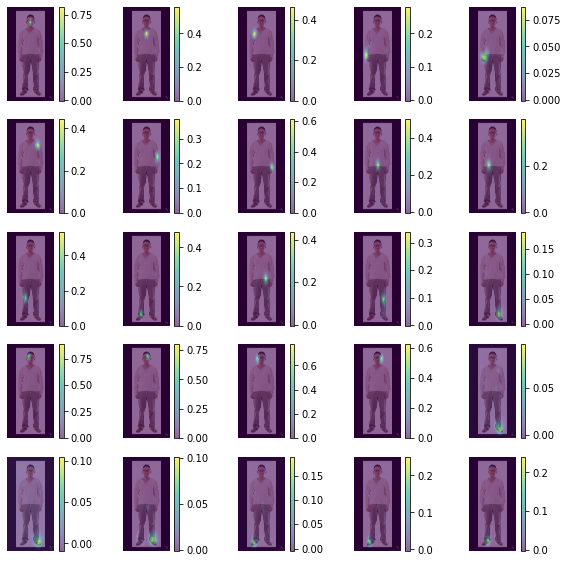

[INFO]Model predicts time:  7.812885999679565


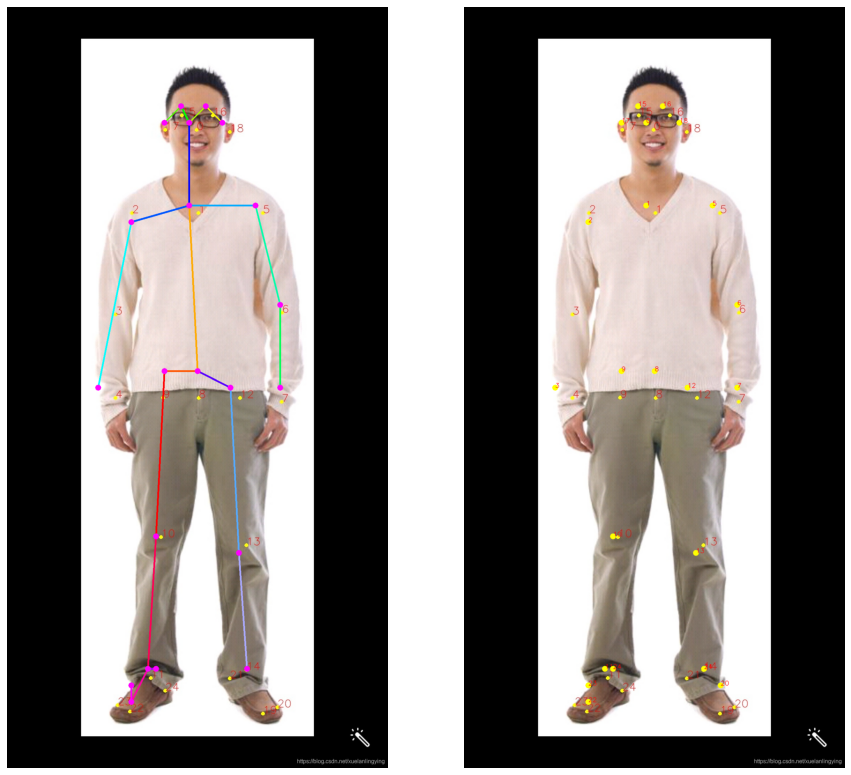

In [37]:
print("[INFO]Pose estimation.")

img_file = "test3.jpg"

start = time.time()
modelpath = "models/"
pose_model = general_pose_model(modelpath, mode="BODY25")
print("[INFO]Model loads time: ", time.time() - start)

start = time.time()
res_points = pose_model.predict(img_file)
print("[INFO]Model predicts time: ", time.time() - start)
pose_model.vis_pose(img_file, res_points)